## libraries

In [1061]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import seaborn as sns

## read csv file

In [1062]:
df = pd.read_csv('Grades.csv')

## convert to classification task

In [1063]:
def replace_finalGrade(x):
    if x >= 17:
        return 0
    elif 14 <= x < 17:
        return 1
    elif 10 <= x < 14:
        return 2
    elif x < 10:
        return 3
        
df['finalGrade'] = df['finalGrade'].apply(replace_finalGrade)

## ready data for model

In [1064]:
def replace_university(x):
    if x == 'PR':
        return 0
    elif x == 'CM':
        return 1
    
df['university'] = df['university'].apply(replace_university)

In [1065]:
def replace_sex(x):
    if x == 'F':
        return 0
    elif x == 'M':
        return 1
    
df['sex'] = df['sex'].apply(replace_sex)

In [1066]:
def replace_address(x):
    if x == 'U':
        return 0
    elif x == 'R':
        return 1
    
df['address'] = df['address'].apply(replace_address)

In [1067]:
one_hot_motherJob = pd.get_dummies(df['motherJob'], prefix='motherJob')

df = pd.concat([df.drop('motherJob', axis=1), one_hot_motherJob], axis=1)

df['motherJob_at_home'] = df['motherJob_at_home'].astype(int)
df['motherJob_health'] = df['motherJob_health'].astype(int)
df['motherJob_other'] = df['motherJob_other'].astype(int)
df['motherJob_services'] = df['motherJob_services'].astype(int)
df['motherJob_teacher'] = df['motherJob_teacher'].astype(int)

### one_hotting mother and father jobs

In [1068]:
one_hot_fatherJob = pd.get_dummies(df['fatherJob'], prefix='fatherJob')

df = pd.concat([df.drop('fatherJob', axis=1), one_hot_fatherJob], axis=1)

df['fatherJob_at_home'] = df['fatherJob_at_home'].astype(int)
df['fatherJob_health'] = df['fatherJob_health'].astype(int)
df['fatherJob_other'] = df['fatherJob_other'].astype(int)
df['fatherJob_services'] = df['fatherJob_services'].astype(int)
df['fatherJob_teacher'] = df['fatherJob_teacher'].astype(int)

### delete other_job and another not important feature

In [1069]:
df = df.drop('fatherJob_other', axis=1)
df = df.drop('motherJob_other', axis=1)
df = df.drop('higher', axis=1)
df = df.drop('university', axis=1)
df = df.drop('universitySupport', axis=1)


### calc mean of DS&EPS grades

In [1070]:
# df['EPS_DS_mean'] = df[['EPSGrade','DSGrade']].mean(axis=1)
# df = df.drop('EPSGrade', axis=1)
# df = df.drop('DSGrade', axis=1)

In [1071]:
df['alcohol'] = df[['Walc','Dalc']].mean(axis=1)
df = df.drop('Walc', axis=1)
df = df.drop('Dalc', axis=1)

In [1072]:
def replace_reason(x):
    if x == 'course':
        return 4
    elif x == 'reputation':
        return 3
    elif x == 'home':
        return 2
    elif x == 'other':
        return 1
    
df['reason'] = df['reason'].apply(replace_reason)

### yes no to binary coded

In [1073]:
# df['universitySupport'] = df['universitySupport'].map({'yes': 1, 'no': 0})
df['paid'] = df['paid'].map({'yes': 1, 'no': 0})
# df['higher'] = df['higher'].map({'yes': 1, 'no': 0})
df['internet'] = df['internet'].map({'yes': 1, 'no': 0})
df['romantic'] = df['romantic'].map({'yes': 1, 'no': 0})


## nomalized some numeric feature

scaler = StandardScaler() --->formula   z = x−μ\σ   is not sensetive from outlier

scaler = MinMaxScaler()  --->formula     x′ = x−xmin \ xmax−xmin       is very sensetive from outlier
​

In [1074]:
scaler = StandardScaler()
# scaler = MinMaxScaler()
df['age'] = scaler.fit_transform(df[['age']]) 
df['absences'] = scaler.fit_transform(df[['absences']]) 
df['EPSGrade'] = scaler.fit_transform(df[['EPSGrade']]) 
df['DSGrade'] = scaler.fit_transform(df[['DSGrade']])
df['alcohol'] = scaler.fit_transform(df[['alcohol']])
# df['EPS_DS_mean'] = scaler.fit_transform(df[['EPS_DS_mean']]) 
 


### go end fianlgrade

In [1075]:
col_to_move = df['finalGrade'].copy()

df.drop('finalGrade', axis=1, inplace=True)

df.insert(len(df.columns), 'finalGrade', col_to_move)


## import processed data to new_data csv

In [1076]:
df.to_csv('new_data.csv', index=False) 

In [1077]:
x  = df.drop('finalGrade' , axis=1)
y  = df['finalGrade']

In [1078]:
x_train , x_test , y_train , y_test = train_test_split(x,y,test_size=0.2,random_state=42)

If you don't set a random state, the data will be tested every time and the most different one will be selected. If it is equal to a fixed number, our data will not differ each time we run it.

The number 42 is also a joke number (inspired by the science fiction book The Hitchhiker's Guide to the Galaxy, where "42" is the final result of everything!)

# naive_bayes model

In [1079]:
from sklearn.naive_bayes import GaussianNB

model = GaussianNB()

model.fit(x_train, y_train)

y_pred = model.predict(x_test)

acc = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')  
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print(f"Accuracy: {acc}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-Score: {f1}")

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.7625
Precision: 0.7807114624505929
Recall: 0.7625
F1-Score: 0.763874883286648
Confusion Matrix:
[[ 4  2  0  0]
 [ 0 14  2  0]
 [ 0  4 23  3]
 [ 0  0  8 20]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.67      0.80         6
           1       0.70      0.88      0.78        16
           2       0.70      0.77      0.73        30
           3       0.87      0.71      0.78        28

    accuracy                           0.76        80
   macro avg       0.82      0.76      0.77        80
weighted avg       0.78      0.76      0.76        80



## plot naive bays data

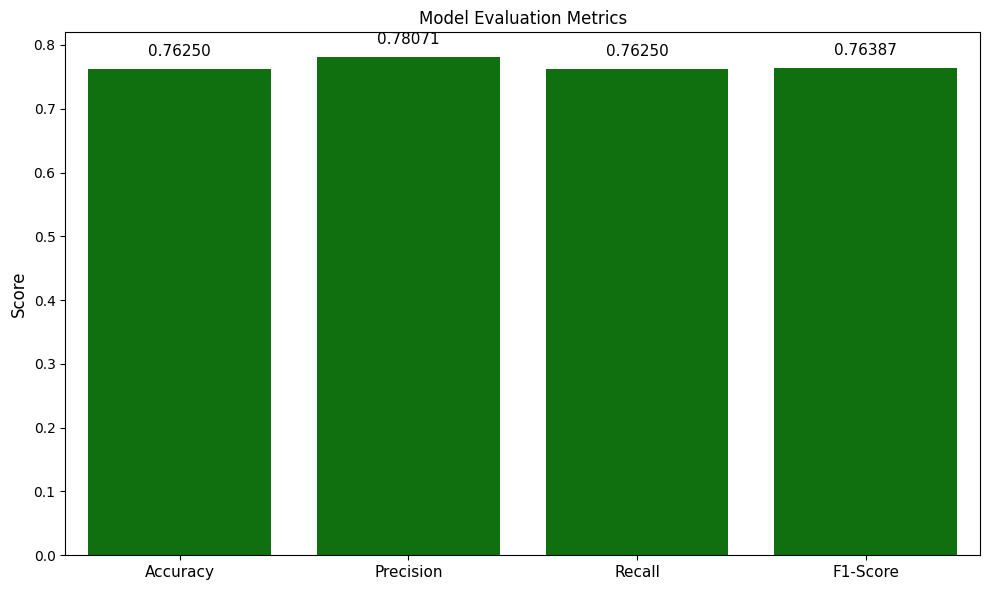

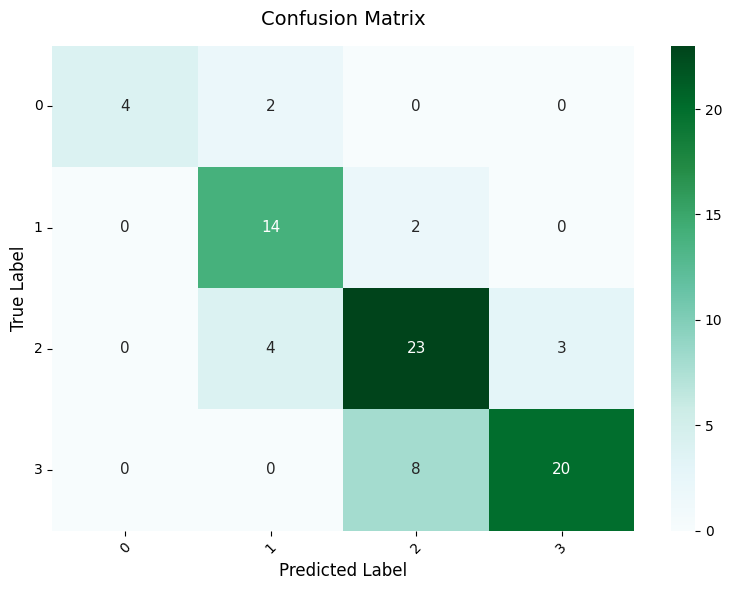

<Figure size 1200x600 with 0 Axes>

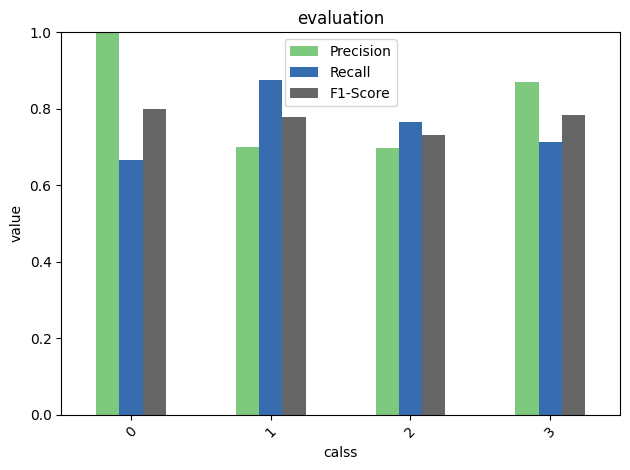

In [1080]:
#1
plt.figure(figsize=(10, 6))
metrics = {
    'Accuracy': acc,
    'Precision': precision,
    'Recall': recall,
    'F1-Score': f1
}
ax = sns.barplot(x=list(metrics.keys()), y=list(metrics.values()), color='green')
plt.title('Model Evaluation Metrics')
plt.ylabel('Score', fontsize=12)
plt.xticks(fontsize=11)
for i, v in enumerate(metrics.values()):
    ax.text(i, v + 0.02, f"{v:.5f}", ha='center', fontsize=11)
plt.tight_layout()
plt.show()



#2
plt.figure(figsize=(8, 6))
cm = np.array(confusion_matrix(y_test, y_pred))
classes = sorted(y_test.unique()) 
sns.heatmap(cm, annot=True, fmt='d', cmap='BuGn',
            xticklabels=classes, yticklabels=classes,
            annot_kws={'fontsize': 11})
plt.title('Confusion Matrix', fontsize=14, pad=15)
plt.xlabel('Predicted Label', fontsize=12)
plt.ylabel('True Label', fontsize=12)
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

#3
report = classification_report(y_test, y_pred, output_dict=True)
df_report = pd.DataFrame(report).transpose()
class_report = df_report.iloc[:-3, :]
plt.figure(figsize=(12, 6))
class_report[['precision', 'recall', 'f1-score']].plot(kind='bar',colormap="Accent")
plt.title('evaluation')
plt.xlabel('calss')
plt.ylabel('value')
plt.xticks(rotation=45)
plt.ylim(0, 1)
plt.legend(['Precision', 'Recall', 'F1-Score'])
plt.tight_layout()
plt.show()

# DecisionTree model (by library)

In [1081]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(random_state=42,max_depth=3,criterion='gini',min_samples_split=3)  

model.fit(x_train, y_train)

y_pred = model.predict(x_test)

acc = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print(f"Accuracy: {acc}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-Score: {f1}")

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("Classification Report:")
print(classification_report(y_test, y_pred))


Accuracy: 0.8875
Precision: 0.8910456062291436
Recall: 0.8875
F1-Score: 0.8858474576271187
Confusion Matrix:
[[ 4  2  0  0]
 [ 0 14  2  0]
 [ 0  0 26  4]
 [ 0  0  1 27]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.67      0.80         6
           1       0.88      0.88      0.88        16
           2       0.90      0.87      0.88        30
           3       0.87      0.96      0.92        28

    accuracy                           0.89        80
   macro avg       0.91      0.84      0.87        80
weighted avg       0.89      0.89      0.89        80



## Explanation of some decisiontree parametrs

1. criterion: { 'gini', 'entropy', 'log_loss' } = "gini"
What it does: Determines the function used to measure the quality of a split at each node.

Options:

"gini" (default): Uses the Gini impurity metric. At each split, it selects the feature and threshold that minimize the weighted sum of Gini impurity in the two resulting child nodes.

"entropy": Uses information gain (based on Shannon entropy). It picks the split that maximizes the reduction in entropy (i.e., maximizes information gain).

"log_loss": Uses the multiclass log loss (also called cross-entropy loss) as the splitting criterion. This is newer in scikit-learn and can be used when you care about predicted class probabilities. In most classification tasks, “gini” or “entropy” are more common.

2. splitter: { 'best', 'random' } = "best"
What it does: Controls how the algorithm chooses which split to make at each node.

Options:

"best" (default): Examines every possible feature and threshold (exhaustive search) to find the absolute best split according to the chosen criterion.

"random": Randomly selects a subset of candidate thresholds for each feature, then picks the best among those. This can speed up training when you have many features, at the cost of potentially slightly less optimal splits.

3. max_depth: int or None = None
What it does: Sets the maximum depth of the tree.

If you provide an integer (e.g., max_depth=5), the tree will grow at most 5 levels. Once a node reaches that depth, it will become a leaf.

If None (default), there is no depth restriction. The tree continues splitting until other stopping conditions (like min_samples_split, min_samples_leaf, or pure nodes) are reached.

Use case: Limiting depth is a common way to prevent overfitting. Shallower trees generalize better but may underfit if set too low.

4. min_samples_split: int or float = 2
What it does: Minimum number of samples required to split an internal node.

If integer (e.g., 10): A node must have at least 10 samples for the algorithm to consider splitting it. If a node has fewer than 10 samples, it becomes a leaf.

If float between 0 and 1 (e.g., 0.05): Interpreted as a fraction of the total number of samples. For example, with 1,000 total samples and min_samples_split=0.05, a node needs at least 50 samples to be eligible for splitting.

Default is 2, meaning a node with only one sample cannot split (it must have at least two to attempt any split).

5. min_samples_leaf: int or float = 1
What it does: Minimum number of samples required to be present in a leaf node.

If integer (e.g., 5): When splitting a node, the algorithm ensures that each resulting child node has at least 5 samples. If a proposed split would leave one child with fewer than 5, that split is disallowed.

If float (e.g., 0.02): Interpreted as a fraction of the total samples. For example, if you have 10,000 samples total and min_samples_leaf=0.02, each leaf must have at least 200 samples.

Default is 1, meaning leaves can have a single sample.

Use case: Prevents creating very small leaves, which can reduce overfitting and make the model more robust to noise.

6. min_weight_fraction_leaf: float = 0.0
What it does: Similar to min_samples_leaf, but expressed as a fraction of the sum of sample weights (useful if you pass sample_weight to fit).

For example, if you set min_weight_fraction_leaf=0.01 and the total weight of all samples is 100, then each leaf must have at least 1 unit of weight. If your samples all have equal weight, this behaves exactly like min_samples_leaf.

Default is 0.0, meaning no restriction based on weighted fractions.

7. max_features: int, float, {'auto', 'sqrt', 'log2'}, or None = None
What it does: Limits the number of features considered when looking for the best split.

If None (default): All features are considered at each split.

If integer (e.g., 5): Exactly that many features (chosen at random) are considered at each split.

If float between 0 and 1 (e.g., 0.3): Interpreted as a fraction of the total number of features. For example, with 20 features total, max_features=0.3 means about 6 features (0.3 × 20) are chosen at random at each split.

If "auto": Interpreted as None for DecisionTreeClassifier (i.e., all features).

If "sqrt": Equivalent to max_features = sqrt(n_features), i.e., randomly sample √(n_features) features at each split. Common in Random Forests.

If "log2": Equivalent to max_features = log2(n_features), i.e., sample log2(n_features) features at each split.

Use case: Reducing max_features can speed up training and introduce more randomness (useful in ensemble methods). For a single decision tree, it can also help reduce overfitting slightly.

8. random_state: int, RandomState, or None = None
What it does: Controls the randomness of the estimator.

Any randomness in decision tree training can come from:

If splitter="random", selecting random thresholds/features.

If max_features is set to a value that requires random selection of features.

Setting random_state to an integer (e.g., 42) ensures reproducible results (the same splits will be chosen each time you run the code, given the same data and parameters). If None (default), results may differ slightly each run.

9. max_leaf_nodes: int or None = None
What it does: Limits the maximum number of leaf nodes in the tree.

If integer (e.g., 10): The algorithm will build a tree with at most 10 leaves. It does this by greedily choosing splits that reduce impurity until the number of leaves would exceed 10, then it stops.

If None (default): No limit on the number of leaves—other stopping criteria control growth.

Use case: Directly controlling tree complexity by capping how many leaves can exist. A smaller number of leaves yields a simpler model.

10. min_impurity_decrease: float = 0.0
What it does: A node will only be split if this split induces a decrease of the impurity metric (Gini or entropy) of at least min_impurity_decrease.

Concretely:

scss
Copy
Edit
impurity(parent) - [ weight_left * impurity(left) + weight_right * impurity(right) ] ≥ min_impurity_decrease
If the calculated decrease is less than this threshold, no split occurs and the node becomes a leaf.

Default = 0.0, meaning any positive decrease in impurity allows a split.

Use case: By increasing min_impurity_decrease to a positive value, you make the splitting criterion stricter, which yields a simpler tree and helps prevent overfitting.

11. class_weight: dict, list of dicts, "balanced", or None = None
What it does: Assigns weights to classes in order to balance the influence of classes when the dataset is imbalanced.

Options:

None (default): All classes have equal weight of 1.0.

"balanced": Uses the formula

Copy
Edit
weight(class_i) = n_samples / (n_classes * n_samples_in_class_i)
so that rarer classes get larger weights.

A custom dict (e.g., {0: 1.0, 1: 2.0, 2: 0.5}): You explicitly specify a weight for each class label. During training, misclassifying a sample from class 1, for instance, is twice as “costly” as misclassifying a sample from class 0.

A list of dicts: Used for multi-output classification (if you have multiple target arrays, you can supply a separate class‐weight dict for each output).

Use case: Balancing or nearly balancing an imbalanced dataset so that the tree doesn’t favor the majority class too heavily.

12. ccp_alpha: float = 0.0
What it does: Complexity parameter used for minimal cost-complexity pruning.

In cost-complexity pruning, one first grows a full tree (or until other stopping criteria are hit), then prunes nodes whose removal (i.e., turning an internal node into a leaf) results in only a small increase in the overall cost (where cost = impurity + α × (number_of_leaves)).

Concretely, a split is only retained if:

scss
Copy
Edit
increase in impurity ≤ α × (number_of_leaves_subtree_after_split - 1)
If ccp_alpha = 0.0 (default): No pruning is applied.

If ccp_alpha > 0.0: Some branches with low improvement get removed. Larger ccp_alpha values yield smaller, simpler trees.

Use case: If you want to reduce overfitting by pruning back branches that provide only marginal improvement in impurity, increase ccp_alpha.

## plotting tree

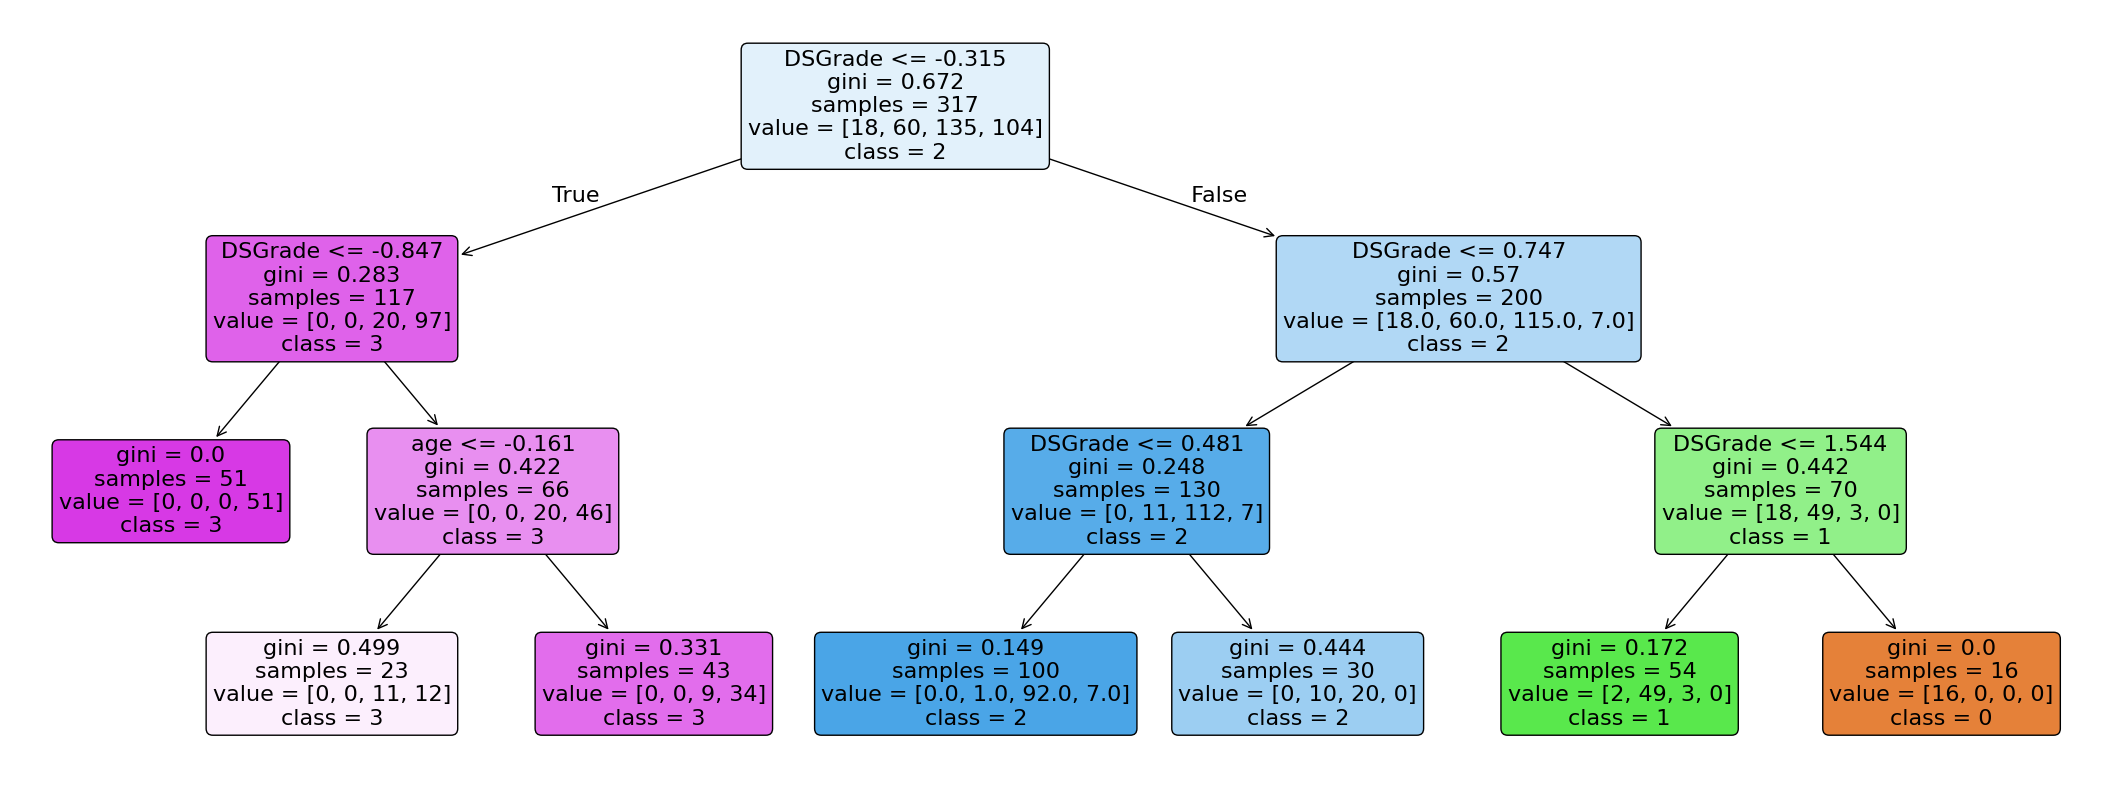

In [1082]:
from sklearn.tree import plot_tree

feature_names = x.columns.tolist()

class_names = [str(c) for c in sorted(y.unique())]

plt.figure(figsize=(27, 10))
plot_tree(
    model,
    feature_names=feature_names,
    class_names=class_names,
    filled=True,
    rounded=True,
    fontsize=16
)
plt.show()


## feature importance

C:\Users\HP\AppData\Local\Temp\ipykernel_2084\44044799.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=importance_df, x='Importance', y='Feature', palette='viridis')


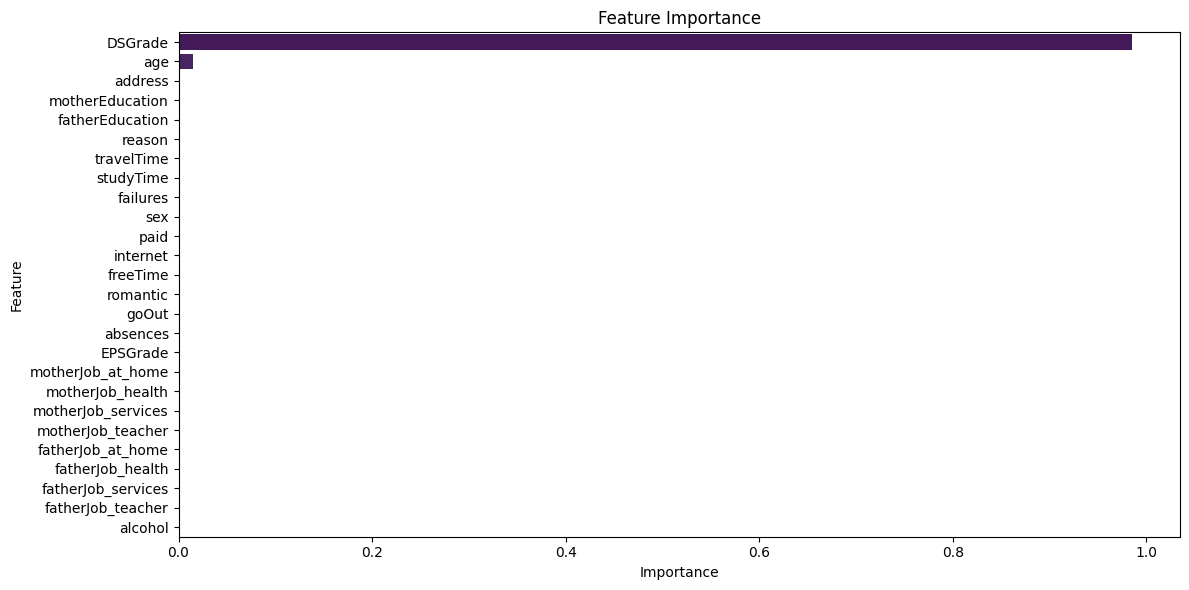

In [1083]:
importances = model.feature_importances_
importance_df = pd.DataFrame({'Feature': x.columns, 'Importance': importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(data=importance_df, x='Importance', y='Feature', palette='viridis')
plt.title('Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

## plot DecisionTree data

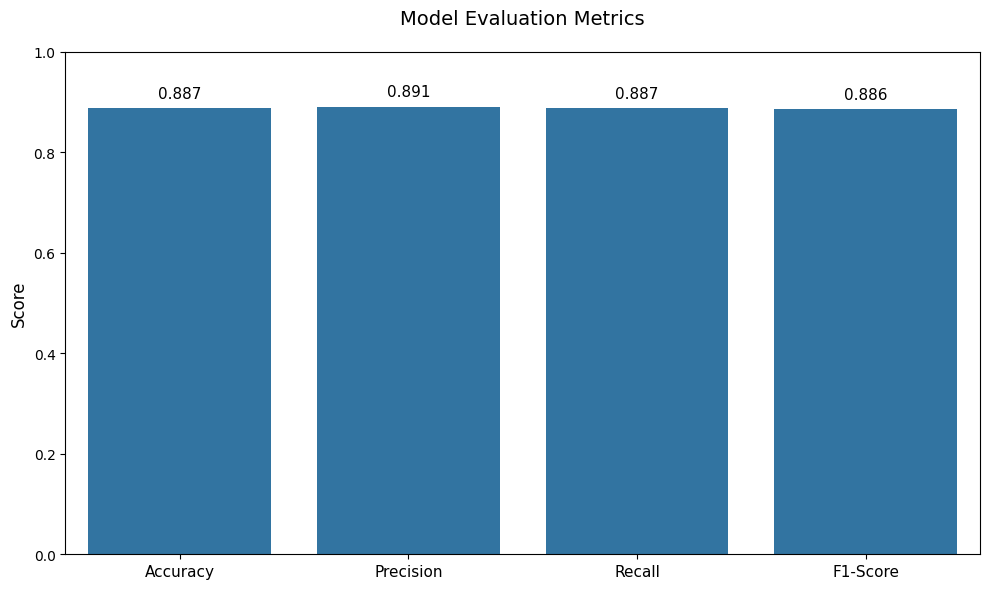

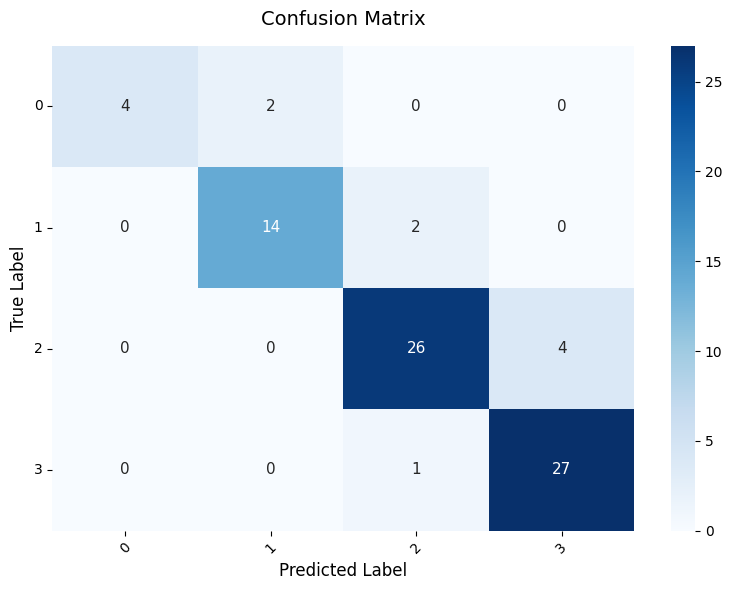

<Figure size 1200x600 with 0 Axes>

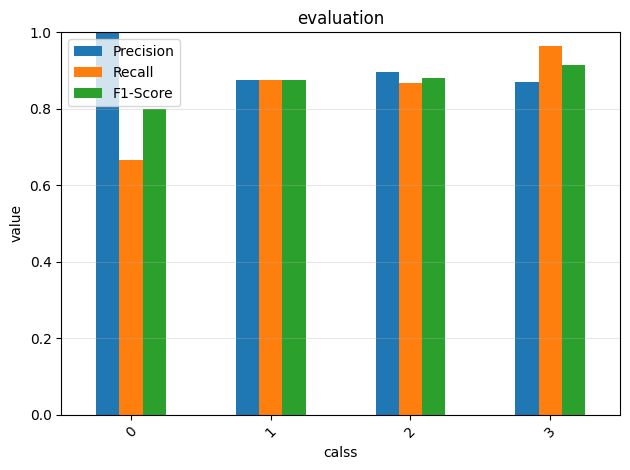

In [1084]:
#1
plt.figure(figsize=(10, 6))
metrics = {
    'Accuracy': acc,
    'Precision': precision,
    'Recall': recall,
    'F1-Score': f1
}
ax = sns.barplot(x=list(metrics.keys()), y=list(metrics.values()), color='#1f77b4')
plt.title('Model Evaluation Metrics', fontsize=14, pad=20)
plt.ylim(0, 1)
plt.ylabel('Score', fontsize=12)
plt.xticks(fontsize=11)
for i, v in enumerate(metrics.values()):
    ax.text(i, v + 0.02, f"{v:.3f}", ha='center', fontsize=11)
plt.tight_layout()
plt.show()



#2
plt.figure(figsize=(8, 6))
cm = np.array(confusion_matrix(y_test, y_pred))
classes = sorted(y_test.unique()) 
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=classes, yticklabels=classes,
            annot_kws={'fontsize': 11})
plt.title('Confusion Matrix', fontsize=14, pad=15)
plt.xlabel('Predicted Label', fontsize=12)
plt.ylabel('True Label', fontsize=12)
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

#3
report = classification_report(y_test, y_pred, output_dict=True)
df_report = pd.DataFrame(report).transpose()
class_report = df_report.iloc[:-3, :]
plt.figure(figsize=(12, 6))
class_report[['precision', 'recall', 'f1-score']].plot(kind='bar')
plt.title('evaluation')
plt.xlabel('calss')
plt.ylabel('value')
plt.xticks(rotation=45)
plt.ylim(0, 1)
plt.grid(axis='y', alpha=0.3)
plt.legend(['Precision', 'Recall', 'F1-Score'])
plt.tight_layout()
plt.show()

# RandomForest model

### RandomForest model with Optimizing

In [1085]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state=42)

rf.fit(x_train, y_train)

y_pred =rf.predict(x_test)

acc = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print(f"\nAccuracy: {acc:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Accuracy: 0.8500
Precision: 0.8581
Recall: 0.8500
F1-Score: 0.8410

Confusion Matrix:
[[ 2  4  0  0]
 [ 0 13  3  0]
 [ 0  0 27  3]
 [ 0  0  2 26]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.33      0.50         6
           1       0.76      0.81      0.79        16
           2       0.84      0.90      0.87        30
           3       0.90      0.93      0.91        28

    accuracy                           0.85        80
   macro avg       0.88      0.74      0.77        80
weighted avg       0.86      0.85      0.84        80



### RandomForest model without Optimizing

In [1086]:
from sklearn.model_selection import RandomizedSearchCV

rf = RandomForestClassifier(random_state=42)

param_dist = {
    'n_estimators': np.arange(50, 300, 50),
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False],
    'criterion': ['gini', 'entropy']
}

rf_random = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_dist,
    n_iter=50,
    cv=5,
    verbose=2,
    random_state=42,
    n_jobs=-1
)

rf_random.fit(x_train, y_train)

print("Best params:", rf_random.best_params_)

best_rf = rf_random.best_estimator_
y_pred = best_rf.predict(x_test)

acc = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print(f"\nAccuracy: {acc:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Fitting 5 folds for each of 50 candidates, totalling 250 fits
Best params: {'n_estimators': np.int64(150), 'min_samples_split': 10, 'min_samples_leaf': 1, 'max_depth': 10, 'criterion': 'gini', 'bootstrap': False}

Accuracy: 0.8625
Precision: 0.8736
Recall: 0.8625
F1-Score: 0.8539

Confusion Matrix:
[[ 2  4  0  0]
 [ 0 14  2  0]
 [ 0  1 26  3]
 [ 0  0  1 27]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.33      0.50         6
           1       0.74      0.88      0.80        16
           2       0.90      0.87      0.88        30
           3       0.90      0.96      0.93        28

    accuracy                           0.86        80
   macro avg       0.88      0.76      0.78        80
weighted avg       0.87      0.86      0.85        80




## param_dist (Hyperparameter space for RandomizedSearchCV):
1. 'n_estimators'
Number of trees in the random forest.

2. 'max_depth'
Maximum depth of each decision tree.

If None, the trees expand until all leaves are pure or contain less than min_samples_split samples.

3. 'min_samples_split'
Minimum number of samples required to split an internal node.

4. 'min_samples_leaf'
Minimum number of samples required to be at a leaf node.

5. 'bootstrap'
Whether bootstrap samples are used when building trees (True = with replacement).

6. 'criterion'
Function to measure the quality of a split.

'gini': Gini impurity

'entropy': Information gain (entropy)

## RandomizedSearchCV parameters:

1. estimator=rf
The model to be optimized, here it's a RandomForestClassifier.

2. param_distributions=param_dist
The dictionary of parameters to sample from during random search.

3. n_iter=50
The number of parameter combinations to try.

4. cv=5
Number of folds in cross-validation (5-fold CV).

5. verbose=2
Controls the amount of logging output. Higher numbers show more details.

6. random_state=42
Controls randomness for reproducibility of results.

7. n_jobs=-1
Uses all available CPU cores for parallel processing (faster computation).

## plot for RandomForest data

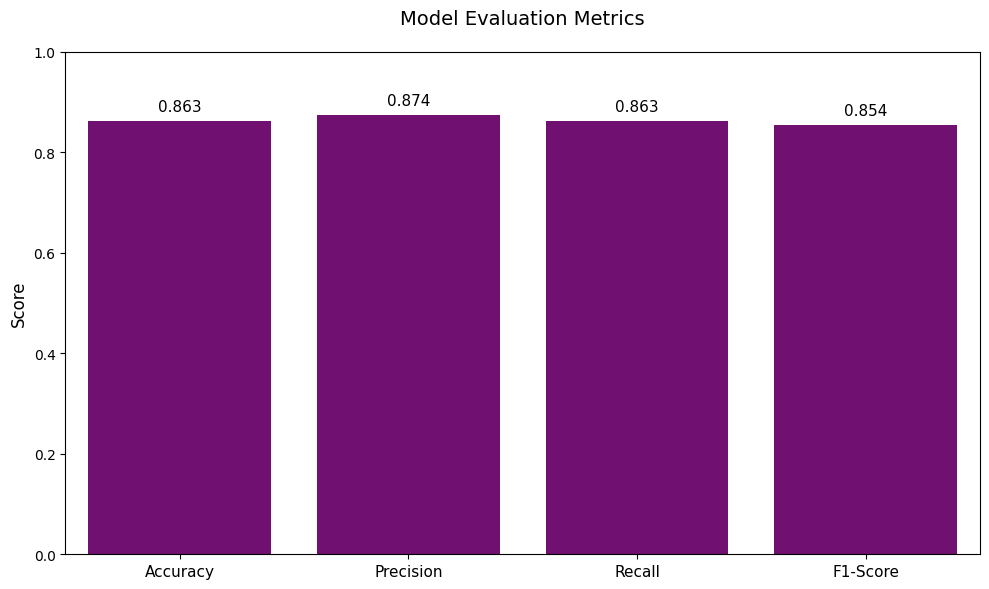

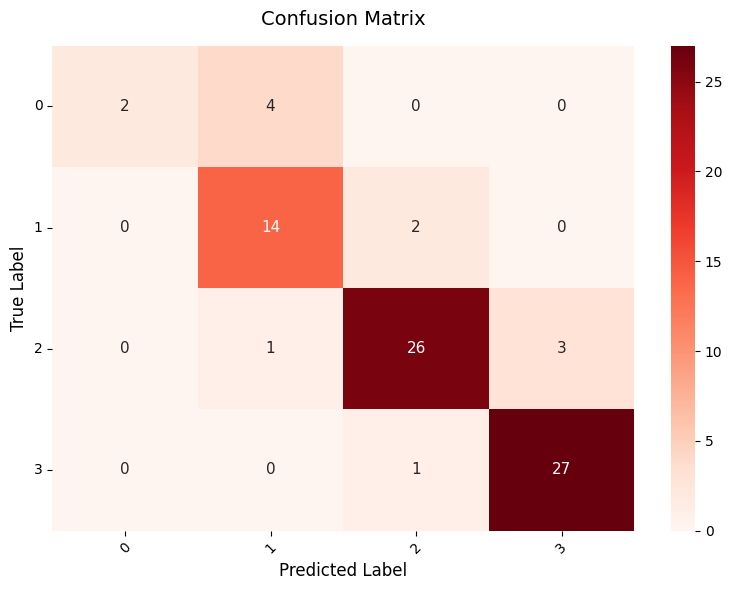

<Figure size 1200x600 with 0 Axes>

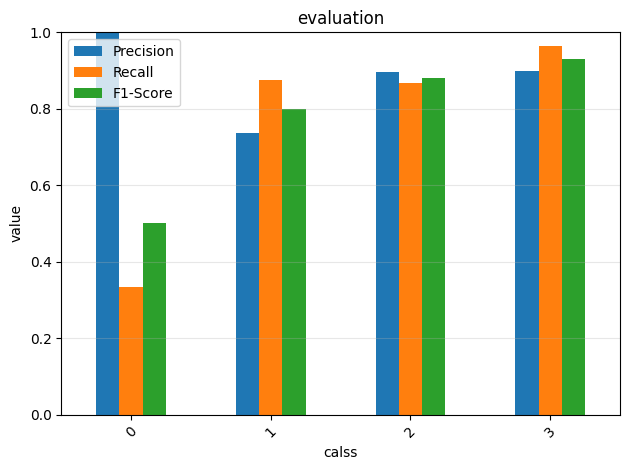

In [1087]:
#1
plt.figure(figsize=(10, 6))
metrics = {
    'Accuracy': acc,
    'Precision': precision,
    'Recall': recall,
    'F1-Score': f1
}
ax = sns.barplot(x=list(metrics.keys()), y=list(metrics.values()), color='purple')
plt.title('Model Evaluation Metrics', fontsize=14, pad=20)
plt.ylim(0, 1)
plt.ylabel('Score', fontsize=12)
plt.xticks(fontsize=11)
for i, v in enumerate(metrics.values()):
    ax.text(i, v + 0.02, f"{v:.3f}", ha='center', fontsize=11)
plt.tight_layout()
plt.show()



#2
plt.figure(figsize=(8, 6))
cm = np.array(confusion_matrix(y_test, y_pred))
classes = sorted(y_test.unique()) 
sns.heatmap(cm, annot=True, fmt='d', cmap='Reds',
            xticklabels=classes, yticklabels=classes,
            annot_kws={'fontsize': 11})
plt.title('Confusion Matrix', fontsize=14, pad=15)
plt.xlabel('Predicted Label', fontsize=12)
plt.ylabel('True Label', fontsize=12)
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

#3
report = classification_report(y_test, y_pred, output_dict=True)
df_report = pd.DataFrame(report).transpose()
class_report = df_report.iloc[:-3, :]
plt.figure(figsize=(12, 6))
class_report[['precision', 'recall', 'f1-score']].plot(kind='bar')
plt.title('evaluation')
plt.xlabel('calss')
plt.ylabel('value')
plt.xticks(rotation=45)
plt.ylim(0, 1)
plt.grid(axis='y', alpha=0.3)
plt.legend(['Precision', 'Recall', 'F1-Score'])
plt.tight_layout()
plt.show()

## xgboost model

### xgboost model without optimizing

In [1088]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV

model = XGBClassifier(random_state=42)

model.fit(x_train, y_train)


y_pred = model.predict(x_test)

acc = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print(f"\nAccuracy: {acc:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Accuracy: 0.8875
Precision: 0.8951
Recall: 0.8875
F1-Score: 0.8862

Confusion Matrix:
[[ 4  2  0  0]
 [ 0 15  1  0]
 [ 0  2 25  3]
 [ 0  0  1 27]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.67      0.80         6
           1       0.79      0.94      0.86        16
           2       0.93      0.83      0.88        30
           3       0.90      0.96      0.93        28

    accuracy                           0.89        80
   macro avg       0.90      0.85      0.87        80
weighted avg       0.90      0.89      0.89        80



### xgboost model with optimizing

In [1089]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV

model = XGBClassifier(random_state=42)

param_grid = {
    'learning_rate': [0.01, 0.1, 0.2],
    'n_estimators': [50, 100, 200],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_depth': [3, 5, 7],
    'max_features': ['sqrt', 'log2']
}

grid_search = GridSearchCV(
    estimator=model,
    param_grid=param_grid,
    cv=5,
    n_jobs=-1,
    verbose=2
)

grid_search.fit(x_train, y_train)

print("Best parameters:", grid_search.best_params_)

best_model = grid_search.best_estimator_
y_pred = best_model.predict(x_test)

acc = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print(f"\nAccuracy: {acc:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Fitting 5 folds for each of 486 candidates, totalling 2430 fits


C:\Users\HP\AppData\Roaming\Python\Python312\site-packages\xgboost\training.py:183: UserWarning: [21:20:33] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "max_features", "min_samples_leaf", "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Best parameters: {'learning_rate': 0.2, 'max_depth': 7, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}

Accuracy: 0.8875
Precision: 0.8903
Recall: 0.8875
F1-Score: 0.8872

Confusion Matrix:
[[ 5  1  0  0]
 [ 0 15  1  0]
 [ 0  2 25  3]
 [ 0  0  2 26]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.83      0.91         6
           1       0.83      0.94      0.88        16
           2       0.89      0.83      0.86        30
           3       0.90      0.93      0.91        28

    accuracy                           0.89        80
   macro avg       0.91      0.88      0.89        80
weighted avg       0.89      0.89      0.89        80



### param_grid = { ... } — Explanation of Each Parameter:

learning_rate

Values: [0.01, 0.1, 0.2]

Controls how much the model learns from each tree.

Smaller values make learning slower but more accurate.

n_estimators

Values: [50, 100, 200]

Number of trees (or iterations) in the ensemble.

More trees can improve performance but increase computation time.

min_samples_split

Values: [2, 5, 10]

Minimum number of samples required to split an internal node.

Higher values make the model more conservative (less complex).

min_samples_leaf

Values: [1, 2, 4]

Minimum number of samples required to be at a leaf node.

Prevents leaves from being too specific (overfitting).

max_depth

Values: [3, 5, 7]

Maximum depth of the individual trees.

Controls model complexity. Deeper trees can capture more detail but may overfit.

max_features

Values: ['sqrt', 'log2']

Number of features to consider when looking for the best split:

'sqrt': square root of total features (common for classification)

'log2': logarithm base 2 of total features



## plot for xgboost data

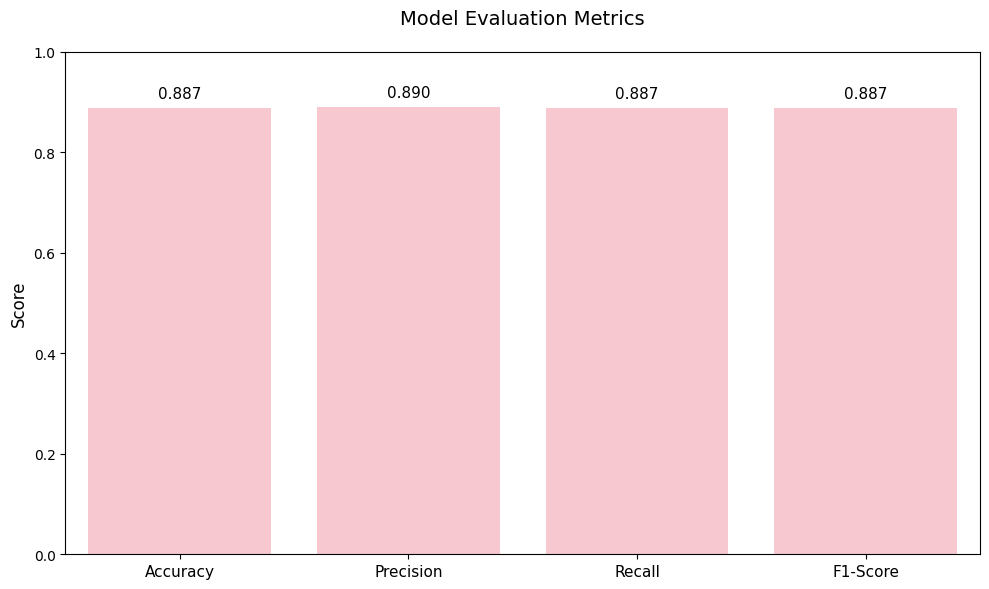

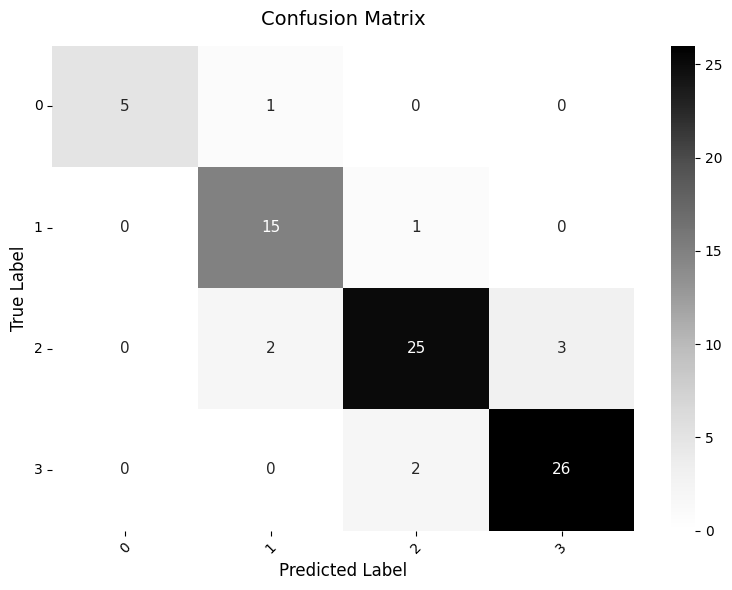

<Figure size 1200x600 with 0 Axes>

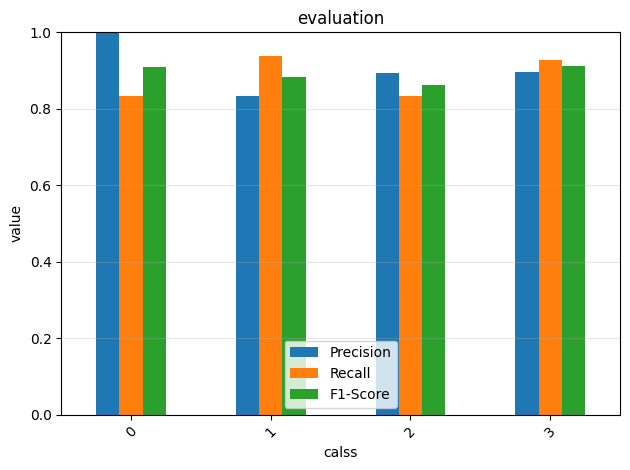

In [1090]:
#1
plt.figure(figsize=(10, 6))
metrics = {
    'Accuracy': acc,
    'Precision': precision,
    'Recall': recall,
    'F1-Score': f1
}
ax = sns.barplot(x=list(metrics.keys()), y=list(metrics.values()), color='pink')
plt.title('Model Evaluation Metrics', fontsize=14, pad=20)
plt.ylim(0, 1)
plt.ylabel('Score', fontsize=12)
plt.xticks(fontsize=11)
for i, v in enumerate(metrics.values()):
    ax.text(i, v + 0.02, f"{v:.3f}", ha='center', fontsize=11)
plt.tight_layout()
plt.show()



#2
plt.figure(figsize=(8, 6))
cm = np.array(confusion_matrix(y_test, y_pred))
classes = sorted(y_test.unique()) 
sns.heatmap(cm, annot=True, fmt='d', cmap='Grays',
            xticklabels=classes, yticklabels=classes,
            annot_kws={'fontsize': 11})
plt.title('Confusion Matrix', fontsize=14, pad=15)
plt.xlabel('Predicted Label', fontsize=12)
plt.ylabel('True Label', fontsize=12)
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

#3
report = classification_report(y_test, y_pred, output_dict=True)
df_report = pd.DataFrame(report).transpose()
class_report = df_report.iloc[:-3, :]
plt.figure(figsize=(12, 6))
class_report[['precision', 'recall', 'f1-score']].plot(kind='bar')
plt.title('evaluation')
plt.xlabel('calss')
plt.ylabel('value')
plt.xticks(rotation=45)
plt.ylim(0, 1)
plt.grid(axis='y', alpha=0.3)
plt.legend(['Precision', 'Recall', 'F1-Score'])
plt.tight_layout()
plt.show()

# DecisionTree model (by coding)

In [1091]:
class Node():
    def __init__(self, feature_index=None, threshold=None, left=None, right=None, info_gain=None, value=None):
        
        self.feature_index = feature_index
        self.threshold = threshold
        self.left = left
        self.right = right
        self.info_gain = info_gain
        self.value = value

In [1092]:
class Decision_Tree_from_Scratch():
    def __init__(self, min_samples_split=2, max_depth=4):
        
        self.root = None
        
        self.min_samples_split = min_samples_split
        self.max_depth = max_depth
        
    def build_tree(self, dataset, curr_depth=0):
        
        X, Y = dataset[:,:-1], dataset[:,-1]
        num_samples, num_features = np.shape(X)
        
        if num_samples>=self.min_samples_split and curr_depth<=self.max_depth:
            best_split = self.get_best_split(dataset, num_samples, num_features)
            if best_split["info_gain"]>0:
                left_subtree = self.build_tree(best_split["dataset_left"], curr_depth+1)
                right_subtree = self.build_tree(best_split["dataset_right"], curr_depth+1)
                return Node(best_split["feature_index"], best_split["threshold"], 
                            left_subtree, right_subtree, best_split["info_gain"])
        
        leaf_value = self.calculate_leaf_value(Y)
        return Node(value=leaf_value)
    
    def get_best_split(self, dataset, num_samples, num_features):
        
        best_split = {}
        max_info_gain = -float("inf")
        
        for feature_index in range(num_features):
            feature_values = dataset[:, feature_index]
            possible_thresholds = np.unique(feature_values)
            for threshold in possible_thresholds:
                dataset_left, dataset_right = self.split(dataset, feature_index, threshold)
                if len(dataset_left)>0 and len(dataset_right)>0:
                    y, left_y, right_y = dataset[:, -1], dataset_left[:, -1], dataset_right[:, -1]
                    curr_info_gain = self.information_gain(y, left_y, right_y, "gini")
                    if curr_info_gain>max_info_gain:
                        best_split["feature_index"] = feature_index
                        best_split["threshold"] = threshold
                        best_split["dataset_left"] = dataset_left
                        best_split["dataset_right"] = dataset_right
                        best_split["info_gain"] = curr_info_gain
                        max_info_gain = curr_info_gain
                        
        return best_split
    
    def split(self, dataset, feature_index, threshold):
 
        dataset_left = np.array([row for row in dataset if row[feature_index]<=threshold])
        dataset_right = np.array([row for row in dataset if row[feature_index]>threshold])
        return dataset_left, dataset_right
    
    def information_gain(self, parent, l_child, r_child, mode="entropy"):
        
        weight_l = len(l_child) / len(parent)
        weight_r = len(r_child) / len(parent)
        if mode=="gini":
            gain = self.gini_index(parent) - (weight_l*self.gini_index(l_child) + weight_r*self.gini_index(r_child))
        else:
            gain = self.entropy(parent) - (weight_l*self.entropy(l_child) + weight_r*self.entropy(r_child))
        return gain
    
    def entropy(self, y):
        
        class_labels = np.unique(y)
        entropy = 0
        for cls in class_labels:
            p_cls = len(y[y == cls]) / len(y)
            entropy += -p_cls * np.log2(p_cls)
        return entropy
    
    def gini_index(self, y):
        
        class_labels = np.unique(y)
        gini = 0
        for cls in class_labels:
            p_cls = len(y[y == cls]) / len(y)
            gini += p_cls**2
        return 1 - gini
        
    def calculate_leaf_value(self, Y):
        
        Y = list(Y)
        return max(Y, key=Y.count)
    
    def fit(self, X, Y):
        
        dataset = np.column_stack((X, Y))
        self.root = self.build_tree(dataset)
    
    def predict(self, X):
        X = np.array(X)
        if X.ndim == 1:
            X = X.reshape(1, -1)
        
        predictions = [self.make_prediction(x, self.root) for x in X]
        return predictions

    def make_prediction(self, x, tree):
        if tree.value!=None: return tree.value
        feature_val = x[tree.feature_index]
        if feature_val<=tree.threshold:
            return self.make_prediction(x, tree.left)
        else:
            return self.make_prediction(x, tree.right)

In [1093]:
classifier = Decision_Tree_from_Scratch(min_samples_split=3, max_depth=3)
classifier.fit(x_train,y_train)

y_pred = classifier.predict(x_test) 

acc = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print(f"Accuracy: {acc}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-Score: {f1}")

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.8875
Precision: 0.8916666666666668
Recall: 0.8875
F1-Score: 0.8862773084256004
Confusion Matrix:
[[ 4  2  0  0]
 [ 0 15  1  0]
 [ 0  1 26  3]
 [ 0  0  2 26]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.67      0.80         6
           1       0.83      0.94      0.88        16
           2       0.90      0.87      0.88        30
           3       0.90      0.93      0.91        28

    accuracy                           0.89        80
   macro avg       0.91      0.85      0.87        80
weighted avg       0.89      0.89      0.89        80



## plotting tree

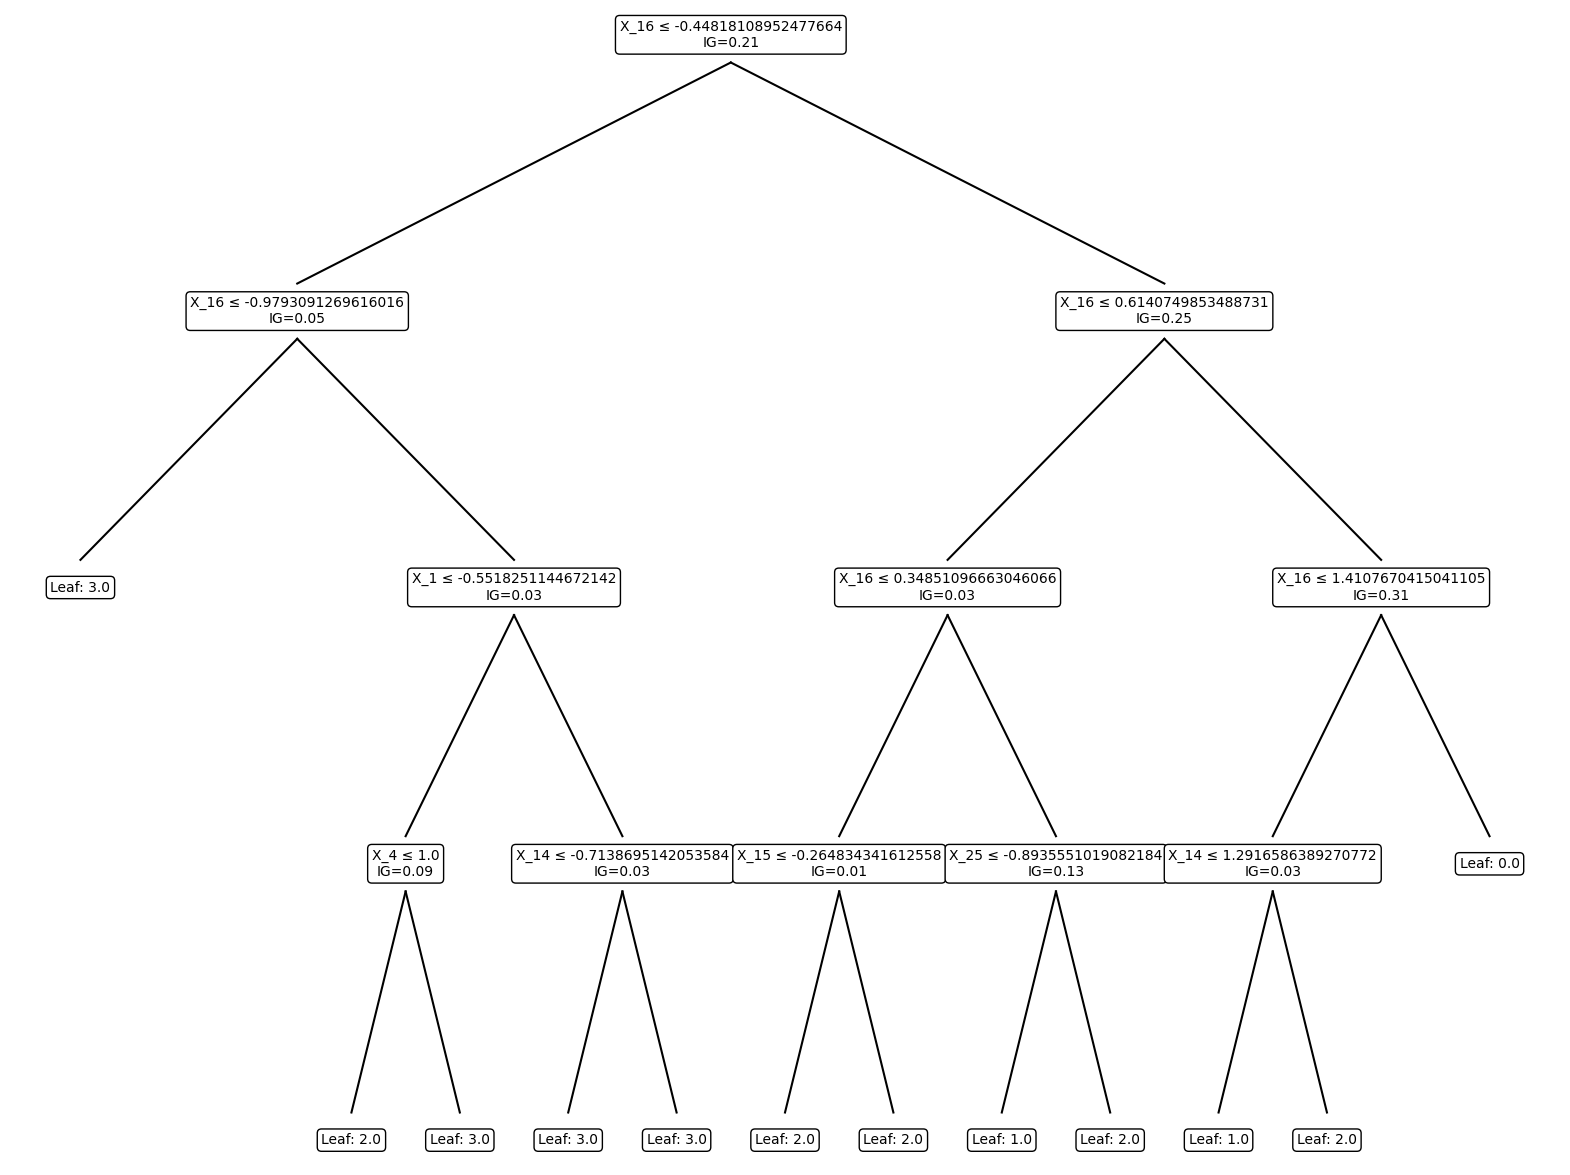

In [1099]:
def plot_tree(node, x=0.5, y=1.0, x_offset=0.5, y_step=0.1, ax=None):
    if ax is None:
        fig, ax = plt.subplots(figsize=(20,15))
        ax.axis('off')
    
    if node is None:
        return

    if getattr(node, "value", None) is not None:
        label = f'Leaf: {node.value}'
    else:
        label = f'X_{node.feature_index} ≤ {node.threshold}\nIG={node.info_gain:.2f}'
    
    ax.text(
        x, y, label,
        ha='center', va='center',
        bbox=dict(boxstyle='round', facecolor='white', edgecolor='black')
    )

    if getattr(node, "left", None) is not None:
        x_left = x - x_offset / 2
        y_child = y - y_step
        ax.plot([x, x_left], [y - 0.01, y_child + 0.01], color='black')
        plot_tree(node.left, x_left, y_child, x_offset / 2, y_step, ax)

    if getattr(node, "right", None) is not None:
        x_right = x + x_offset / 2
        y_child = y - y_step
        ax.plot([x, x_right], [y - 0.01, y_child + 0.01], color='black')
        plot_tree(node.right, x_right, y_child, x_offset / 2, y_step, ax)

    if ax is None:
        plt.show()



plot_tree(classifier.root)
plt.show()



## plot for DecisionTree data

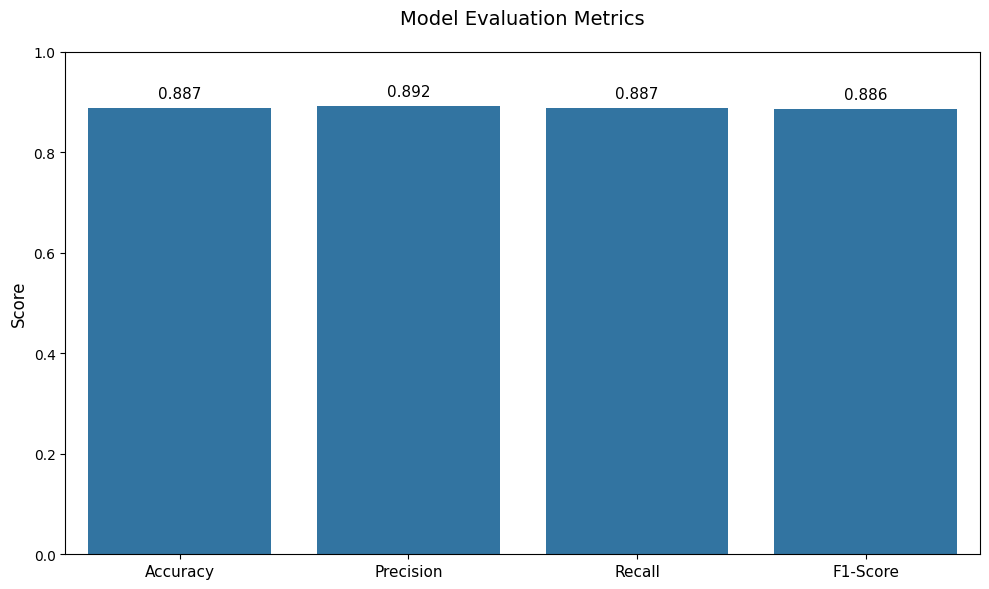

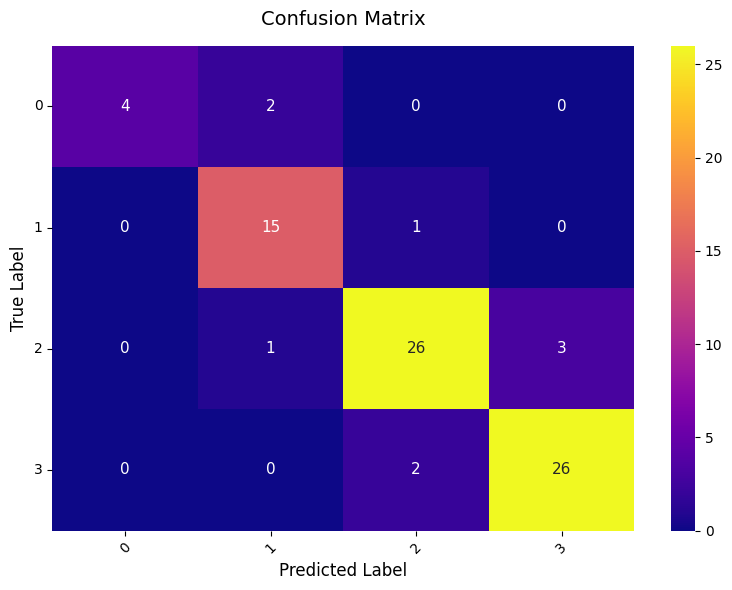

<Figure size 1200x600 with 0 Axes>

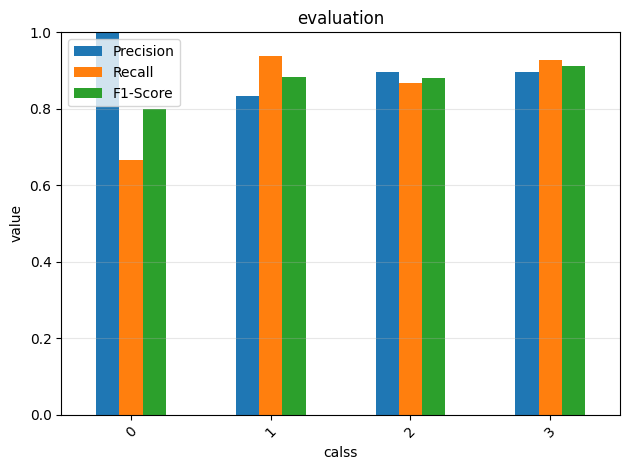

In [1095]:
#1
plt.figure(figsize=(10, 6))
metrics = {
    'Accuracy': acc,
    'Precision': precision,
    'Recall': recall,
    'F1-Score': f1
}
ax = sns.barplot(x=list(metrics.keys()), y=list(metrics.values()), color='#1f77b4')
plt.title('Model Evaluation Metrics', fontsize=14, pad=20)
plt.ylim(0, 1)
plt.ylabel('Score', fontsize=12)
plt.xticks(fontsize=11)
for i, v in enumerate(metrics.values()):
    ax.text(i, v + 0.02, f"{v:.3f}", ha='center', fontsize=11)
plt.tight_layout()
plt.show()

#2
plt.figure(figsize=(8, 6))
cm = np.array(confusion_matrix(y_test, y_pred))
classes = sorted(y_test.unique()) 
sns.heatmap(cm, annot=True, fmt='d', cmap='plasma',xticklabels=classes, yticklabels=classes,annot_kws={'fontsize': 11})
plt.title('Confusion Matrix', fontsize=14, pad=15)
plt.xlabel('Predicted Label', fontsize=12)
plt.ylabel('True Label', fontsize=12)
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

#3
report = classification_report(y_test, y_pred, output_dict=True)
df_report = pd.DataFrame(report).transpose()
class_report = df_report.iloc[:-3, :]
plt.figure(figsize=(12, 6))
class_report[['precision', 'recall', 'f1-score']].plot(kind='bar')
plt.title('evaluation')
plt.xlabel('calss')
plt.ylabel('value')
plt.xticks(rotation=45)
plt.ylim(0, 1)
plt.grid(axis='y', alpha=0.3)
plt.legend(['Precision', 'Recall', 'F1-Score'])
plt.tight_layout()
plt.show()